<a href="https://colab.research.google.com/github/nikhilbordekar/KPMG_Virtual_Internship/blob/main/KPMG_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KPMG VIRTUAL INTERNSHIP PROJECT**

**TASK 2: DATA INSIGHTS**

The client provided KPMG with 4 datasets:

1.Customer Demographic

2.Customer Addresses

3.Transactions data in the past 3 months

4.New Customer List

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
#LOADING THE DATASET
data = pd.ExcelFile('/content/drive/MyDrive/Projects/KPMG/KPMG_VI_New_raw_data_update_final.xlsx')

In [ ]:
#Reading each file separately
Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')

<ipython-input-3-ec2de8ff8fd5>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel(data, 'NewCustomerList')
<ipython-input-3-ec2de8ff8fd5>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')


**EXPLORING THE 'TRANSACTIONS' DATASET**

In [ ]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
# Dataset Rows & Columns count
Transactions.shape

(20000, 13)

In [ ]:
# Dataset Info
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
# Dataset Duplicate Value Count
Transactions.duplicated().sum()

0

In [ ]:
# Missing Values/Null Values Count
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
# Dataset Describe
Transactions.describe(include='all')

<ipython-input-9-5d477a6ce7df>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Transactions.describe(include='all')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [ ]:
#Looking at number of columns in ths dataset
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
T_col=['order_status','brand','product_line','product_class', 'product_size',]
for i in T_col:

  print(f'The unique values in {i} are:', Transactions[i].unique())

The unique values in order_status are: ['Approved' 'Cancelled']
The unique values in brand are: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
The unique values in product_line are: ['Standard' 'Road' 'Mountain' 'Touring' nan]
The unique values in product_class are: ['medium' 'low' 'high' nan]
The unique values in product_size are: ['medium' 'large' 'small' nan]


Eliminating the null values in the whole dataset for accurate EDA

In [ ]:
Trsn = Transactions.dropna(how='all', subset=Transactions.columns[Transactions.dtypes == 'object'], inplace=False)


In [ ]:
Trsn.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
Trsn.shape

(20000, 13)

In [ ]:
Mode=Trsn.groupby('order_status')['transaction_id'].count()
Mode

order_status
Approved     19821
Cancelled      179
Name: transaction_id, dtype: int64

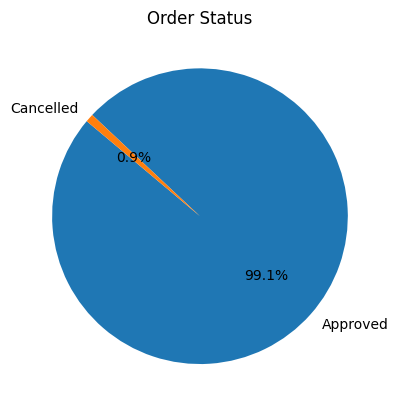

In [ ]:
plt.pie(Mode, labels=['Approved','Cancelled'], autopct='%1.1f%%', startangle=140)
plt.title('Order Status')
plt.show()

- 0.9% order status is cancelled.

In [ ]:
# Create a variable month to denote the transaction month
Trsn['Month'] = Trsn['transaction_date'].apply(lambda x: x.strftime("%Y-%m-%d") [:7])

In [ ]:
Trsn[['Month', 'transaction_date']]

,Month,transaction_date
0,2017-02,2017-02-25
1,2017-05,2017-05-21
2,2017-10,2017-10-16
3,2017-08,2017-08-31
4,2017-10,2017-10-01
...,...,...
19995,2017-06,2017-06-24
19996,2017-11,2017-11-09
19997,2017-04,2017-04-14
19998,2017-07,2017-07-03


In [ ]:
monthly_sales=Trsn['Month'].value_counts().sort_index()
monthly_sales

2017-01    1682
2017-02    1623
2017-03    1656
2017-04    1655
2017-05    1685
2017-06    1581
2017-07    1717
2017-08    1749
2017-09    1572
2017-10    1771
2017-11    1665
2017-12    1644
Name: Month, dtype: int64

In [ ]:
monthly_sales.min()

1572

Text(0, 0.5, 'Sales')

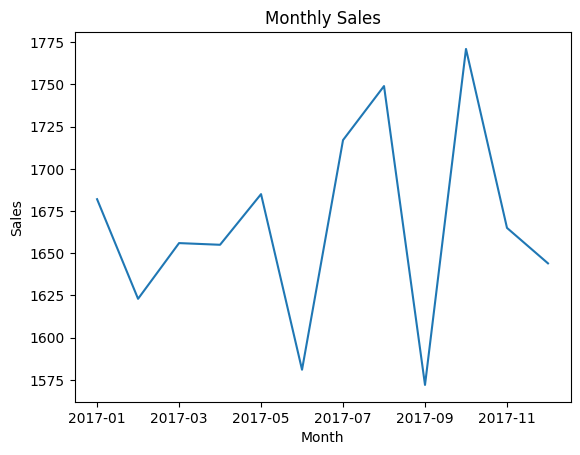

In [ ]:
monthly_sales.plot()
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')


*   June 2017 and September 2017 are the months where sales is very low compared to other months

*   October 2017 is the month where sales are all time high in the year 2017.



In [ ]:
Brand=Trsn.groupby('brand')['transaction_id'].count()
Brand

brand
Giant Bicycles    3312
Norco Bicycles    2910
OHM Cycles        3043
Solex             4253
Trek Bicycles     2990
WeareA2B          3295
Name: transaction_id, dtype: int64

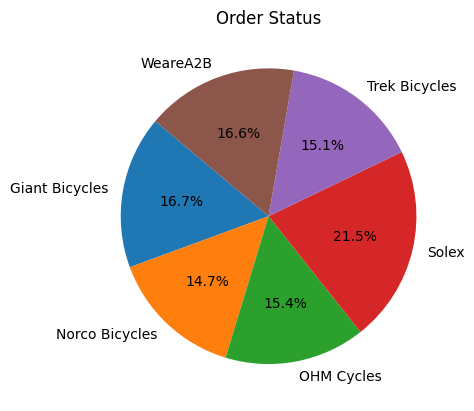

In [ ]:
plt.pie(Brand, labels=['Giant Bicycles','Norco Bicycles','OHM Cycles','Solex','Trek Bicycles','WeareA2B'], autopct='%1.1f%%', startangle=140)
plt.title('Order Status')
plt.show()

In [ ]:
Trsn_col=['order_status','brand','product_line','product_class', 'product_size',]
for i in Trsn_col:

  print(f'The unique values in {i} are:', Trsn[i].unique())

The unique values in order_status are: ['Approved' 'Cancelled']
The unique values in brand are: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
The unique values in product_line are: ['Standard' 'Road' 'Mountain' 'Touring' nan]
The unique values in product_class are: ['medium' 'low' 'high' nan]
The unique values in product_size are: ['medium' 'large' 'small' nan]


In [ ]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.76,0.9500,1.1875,1.009375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.48,0.4800,0.6000,0.510000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.85,0.8500,0.8500,0.850000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.43,0.5375,0.5375,0.537500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.77,0.7700,0.9625,0.962500,4,4,1.703125


In [ ]:
new_cust_list_clean = NewCustomerList.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.76,0.9500,1.187500,1.009375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.48,0.4800,0.600000,0.510000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.85,0.8500,0.850000,0.850000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.43,0.5375,0.537500,0.537500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.77,0.7700,0.962500,0.962500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.88,0.8800,0.880000,0.880000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.90,0.9000,1.125000,0.956250,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.61,0.7625,0.762500,0.762500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.52,0.6500,0.650000,0.552500,997,997,0.357000


In [ ]:
aaa=new_cust_list_clean.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum()
aaa

job_industry_category
Argiculture           1132
Entertainment         1670
Financial Services    9576
Health                6420
IT                    1572
Manufacturing         8097
Property              2209
Retail                3924
Telecommunications    1012
Name: past_3_years_bike_related_purchases, dtype: int64

Text(0.5, 0, 'Industry')

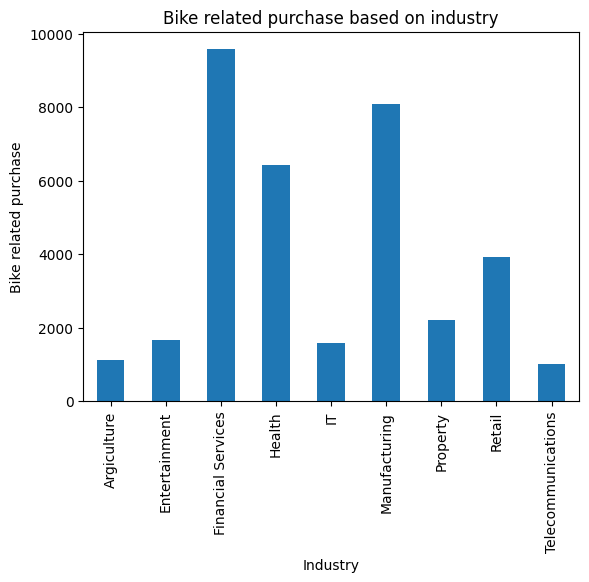

In [ ]:
aaa.plot(kind='bar')

plt.title('Bike related purchase based on industry')
plt.ylabel('Bike related purchase')
plt.xlabel('Industry')

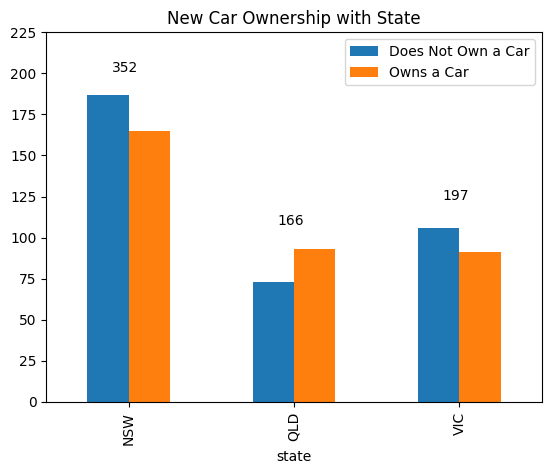

In [ ]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()